In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataanime.csv')
dataset.sample(5)

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
532,Digimon Adventure tri. 3: Kokuhaku,Movie,1,Finished Airing,2016-9-24,-,-,-,"Bandai,Ai Addiction",Shout! Factory,Toei Animation,Original,"Action,Adventure,Comedy,Drama",1 hr. 45 min.,PG-13,7.98,19394,38530,119,Taichi and friends can't hide how disturbing i...
700,Heartcatch Precure!,TV,49,Finished Airing,2010-2-7,2011-1-30,Winter,Sundays at 08:30 (JST),-,-,Toei Animation,Original,"Action,Slice of Life,Fantasy,Magic,Comedy,Scho...",24 min. per ep.,G,7.87,5369,16243,359,2nd year middle school student Tsubomi Hanasak...
829,Akagami no Shirayuki-hime: Nandemonai Takaramo...,OVA,1,Finished Airing,2016-1-5,-,-,-,-,-,Bones,Manga,"Drama,Fantasy,Romance,Shoujo",24 min.,PG-13,7.79,16706,33741,89,Bundled with the limited edition 15th volume o...
943,Initial D Battle Stage 2,OVA,1,Finished Airing,2007-5-30,-,-,-,OB Planning,-,A.C.G.T.,Manga,"Action,Cars,Sports,Drama,Seinen",1 hr. 20 min.,PG-13,7.74,7061,14482,17,This is simply the OAV summing up the major ev...
239,Black Lagoon: The Second Barrage,TV,12,Finished Airing,2006-10-3,2006-12-19,Fall,-,"Geneon Universal Entertainment,Front Line","Funimation,Geneon Entertainment USA",Madhouse,Manga,"Action,Seinen",24 min. per ep.,R,8.27,163780,258565,1855,"Rokurou ""Rock"" Okajima has joined the Lagoon C..."


In [3]:
# dataset.Type.value_counts()

In [4]:
# dataset.columns
dataset.keys()

Index(['Title', 'Type', 'Episodes', 'Status', 'Start airing', 'End airing',
       'Starting season', 'Broadcast time', 'Producers', 'Licensors',
       'Studios', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Description'],
      dtype='object')

In [5]:
dataset.nunique()

Title              1563
Type                  6
Episodes            107
Status                2
Start airing       1170
End airing          761
Starting season       5
Broadcast time      199
Producers           809
Licensors           111
Studios             200
Sources              14
Genres             1004
Duration            171
Rating                5
Score               146
Scored by          1548
Members            1548
Favorites           924
Description        1545
dtype: int64

In [6]:
# new_ds = dataset.drop(['Title','Episodes' ,'Producers','Licensors','Starting_season','Studios','Genres', 'Duration', 'Members','Favorites','Description','Start_airing' ,'End_airing', 'Broadcast_time' ,'Scored_by'],axis=1)
new_ds = dataset.drop(['Title','Episodes' ,'Producers','Licensors','Starting season','Studios','Genres','Duration', 'Members','Favorites','Description','Start airing' ,'End airing', 'Broadcast time' ,'Scored by'],axis=1)

## Data Preprocessing

In [7]:
new_ds.dropna(inplace=True) 

In [8]:
new_ds.isna().sum()

Type       0
Status     0
Sources    0
Rating     0
Score      0
dtype: int64

In [9]:
new_ds["Status"]= new_ds["Status"].replace("Finished Airing", "0") 
new_ds["Status"]= new_ds["Status"].replace("Currently Airing", "1") 

new_ds = new_ds[new_ds.Type!='Music']
new_ds = new_ds[new_ds.Type!='ONA']
new_ds = new_ds[new_ds.Type!='Special']
new_ds = new_ds[new_ds.Type!='OVA']

new_ds["Rating"]= new_ds["Rating"].replace("R", "5") 
new_ds["Rating"]= new_ds["Rating"].replace("PG-13", "4") 
new_ds["Rating"]= new_ds["Rating"].replace("PG", "3") 
new_ds["Rating"]= new_ds["Rating"].replace("G", "2") 
new_ds["Rating"]= new_ds["Rating"].replace("None", "1") 

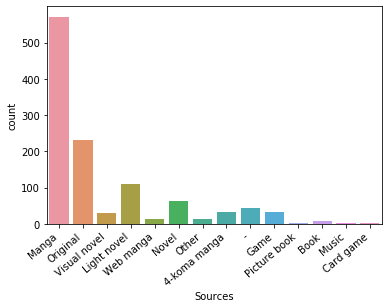

In [10]:
ax = sns.countplot(new_ds.Sources)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [11]:
new_ds["Sources"]= new_ds["Sources"].replace("Manga", "1") 
new_ds["Sources"]= new_ds["Sources"].replace("Original", "2") 
new_ds['Sources'].replace(to_replace=['Light novel','Novel','Visual novel','Web manga','Other','4-koma manga','-','Game','Picture book','Book','Music','Card game'],
    value='3',
    inplace=True
)

In [12]:
new_ds.head()

,Type,Status,Sources,Rating,Score
0,TV,0,1,5,9.25
1,Movie,0,2,4,9.19
2,TV,0,1,5,9.16
3,TV,1,3,4,9.16
4,TV,0,3,4,9.14


In [13]:
new_ds.Sources.value_counts()

1    571
3    353
2    230
Name: Sources, dtype: int64

In [14]:
x=new_ds.drop('Type',axis=1).values
y=new_ds.Type.values

In [15]:
x.shape

(1154, 4)

In [16]:
y.shape

(1154,)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
sc=StandardScaler()

In [19]:
x=sc.fit_transform(x)

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=0,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(923, 4) (231, 4) (923,) (231,)


## K-Nearest Neighbours (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [99]:
y_preds=knn.predict(x_test)

In [100]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [101]:
accuracy_score(y_test,y_preds)

0.7186147186147186

In [102]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       Movie       0.56      0.13      0.22        67
          TV       0.73      0.96      0.83       164

    accuracy                           0.72       231
   macro avg       0.65      0.55      0.52       231
weighted avg       0.68      0.72      0.65       231



In [103]:
import matplotlib.font_manager as fm


In [129]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[  9,  58],
       [  7, 157]], dtype=int64)

In [131]:
# !pip install --upgrade scikit-learn

In [132]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

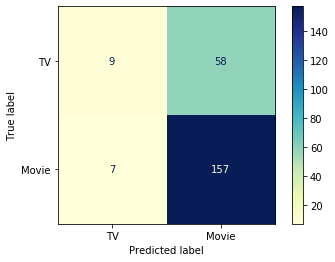

In [163]:
# 3
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['TV','Movie'])

disp = disp.plot(include_values=True, cmap='YlGnBu', xticks_rotation='horizontal')
plt.show()

## Linear Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [136]:
y_preds_regr = reg.predict(x_test)

In [137]:
print(classification_report(y_test, y_preds_regr))

              precision    recall  f1-score   support

       Movie       0.42      0.07      0.13        67
          TV       0.72      0.96      0.82       164

    accuracy                           0.70       231
   macro avg       0.57      0.52      0.47       231
weighted avg       0.63      0.70      0.62       231



In [138]:
reg.score(x_test, y_test)

0.7012987012987013

In [139]:
accuracy_score(y_test, y_preds_regr)

0.7012987012987013

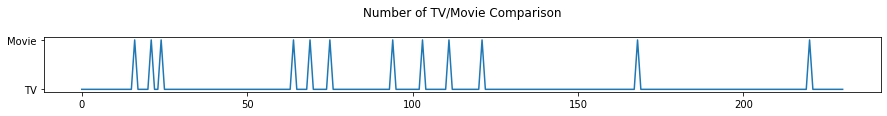

In [169]:
plt.figure(figsize=[15,1])
plt.plot(y_preds_regr)
plt.title('Number of TV/Movie Comparison\n')
plt.show()

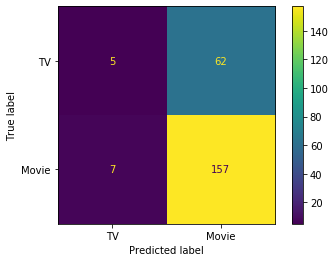

In [141]:
linreg_cm = confusion_matrix(y_test, y_preds_regr)
reg_disp = ConfusionMatrixDisplay(confusion_matrix=linreg_cm,
                              display_labels=['TV','Movie'])

reg_disp = reg_disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal')
plt.show()

## Naive Bayes

In [142]:
from sklearn.naive_bayes import GaussianNB

In [143]:
nb = GaussianNB()
nb.fit(x_train,y_train)
lol=nb.fit(x_train,y_train)

In [144]:
y_train_pred = nb.predict(x_train)
y_test_pred = nb.predict(x_test)

print('Training Accuracy : ',np.mean(y_train_pred==y_train))
print('Testing  Accuracy : ',np.mean(y_test_pred==y_test))

Training Accuracy :  0.5720476706392199
Testing  Accuracy :  0.5541125541125541


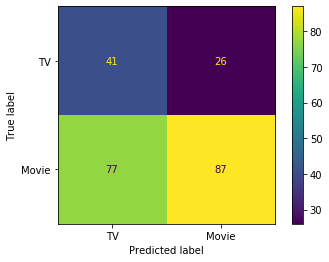

In [145]:
nb_cm = confusion_matrix(y_test, y_test_pred)
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm,
                              display_labels=['TV','Movie'])

nb_disp = nb_disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal')
plt.show()

## Stochastic Gradient Descent

In [121]:
from sklearn.linear_model import SGDClassifier

In [122]:
sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)

SGDClassifier(loss='modified_huber', random_state=101)

In [123]:
y_pred_sgd = sgd.predict(x_test)

In [124]:
accuracy_score(y_test, y_pred_sgd)

0.7272727272727273

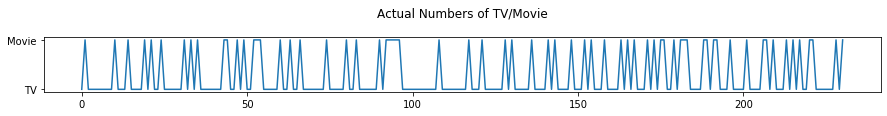

In [188]:
plt.figure(figsize=[15,1])
plt.plot(y_test)
plt.title('Actual Numbers of TV/Movie\n')
plt.show()

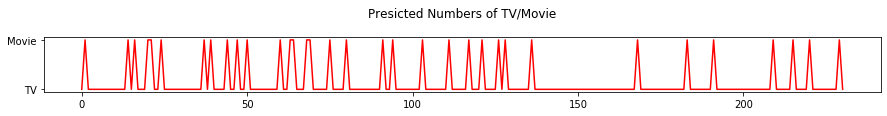

In [189]:
plt.figure(figsize=[15,1])
plt.plot(y_pred_sgd, color='r')
plt.title('Presicted Numbers of TV/Movie\n')
plt.show()

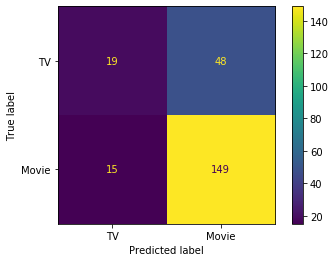

In [165]:
sgd_cm = confusion_matrix(y_test, y_pred_sgd)
sgd_disp = ConfusionMatrixDisplay(confusion_matrix=sgd_cm,
                              display_labels=['TV','Movie'])

sgd_disp = sgd_disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal')
plt.show()

## Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier 

In [148]:
dtree = DecisionTreeClassifier(max_depth=10, max_features=None, random_state=101, min_samples_leaf=15)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=101)

In [149]:
y_pred_dtree = dtree.predict(x_test)

In [150]:
accuracy_score(y_test, y_pred_dtree)

0.6753246753246753

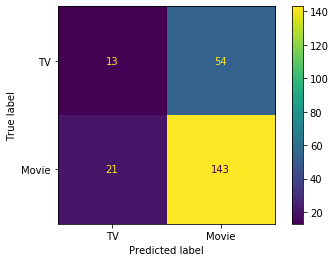

In [151]:
dtree_cm = confusion_matrix(y_test, y_pred_dtree)
dtree_disp = ConfusionMatrixDisplay(confusion_matrix=dtree_cm,
                              display_labels=['TV','Movie'])

dtree_disp = dtree_disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal')
plt.show()

## Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf = RandomForestClassifier(n_estimators=7,n_jobs=-1,max_features=None, random_state=101,min_samples_leaf=30)
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=7,
                       n_jobs=-1, random_state=101)

In [154]:
y_pred_rf = rf.predict(x_test)

In [155]:
accuracy_score(y_test, y_pred_rf)

0.7142857142857143

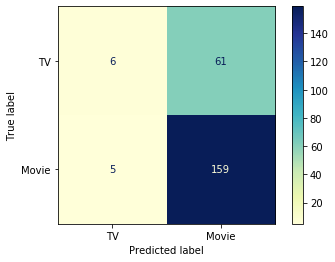

In [166]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                              display_labels=['TV','Movie'])

rf_disp = rf_disp.plot(include_values=True, cmap='YlGnBu', xticks_rotation='horizontal')
plt.show()

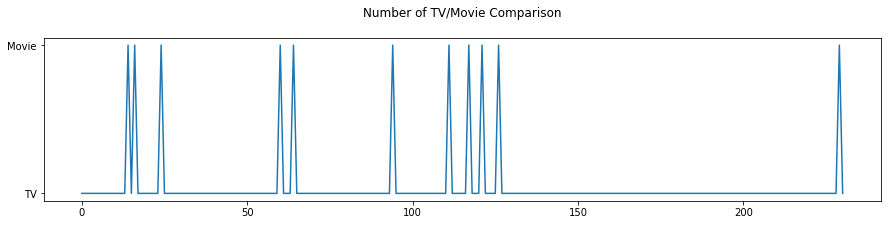

In [177]:
plt.figure(figsize=[15,3])
plt.plot(y_pred_rf)
plt.title('Number of TV/Movie Comparison\n')
plt.show()

## Support vector machine

In [157]:
from sklearn.svm import SVC

In [158]:
svc = SVC(kernel='linear',C=0.025,random_state=101)
svc = svc.fit(x_train,y_train)

In [159]:
y_pred_svc = svc.predict(x_test)

In [160]:
accuracy_score(y_test, y_pred_svc)

0.70995670995671

In [161]:
svc_cm = confusion_matrix(y_test, y_pred_svc)

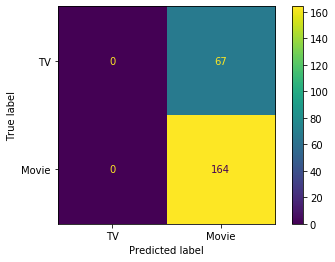

In [162]:
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                              display_labels=['TV','Movie'])

svm_disp = svm_disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal')
plt.show()